In [1]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Importing Packages

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a variable
supermarket_data = pd.read_csv('/content/SuperMarket Analysis.csv')

# Display the first few rows
supermarket_data.head()

# Check the basic information about the dataset
supermarket_data.info()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Data Preparation

In [4]:
# Convert 'Date' and 'Time' columns to appropriate datetime types
supermarket_data['Date'] = pd.to_datetime(supermarket_data['Date'])
supermarket_data['Time'] = pd.to_datetime(supermarket_data['Time'], format='%I:%M:%S %p').dt.time

# Check for duplicate rows
duplicate_rows = supermarket_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Unit price'>

Text(0.5, 1.0, 'Boxplot of Unit price')

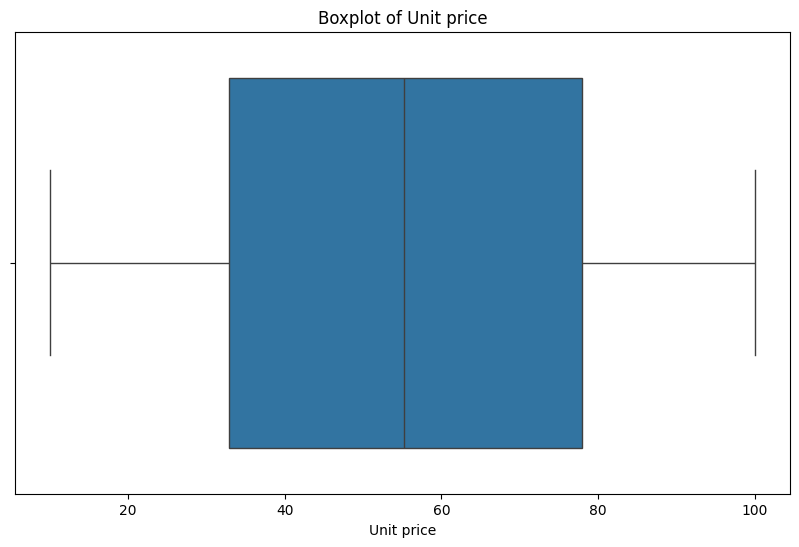

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Quantity'>

Text(0.5, 1.0, 'Boxplot of Quantity')

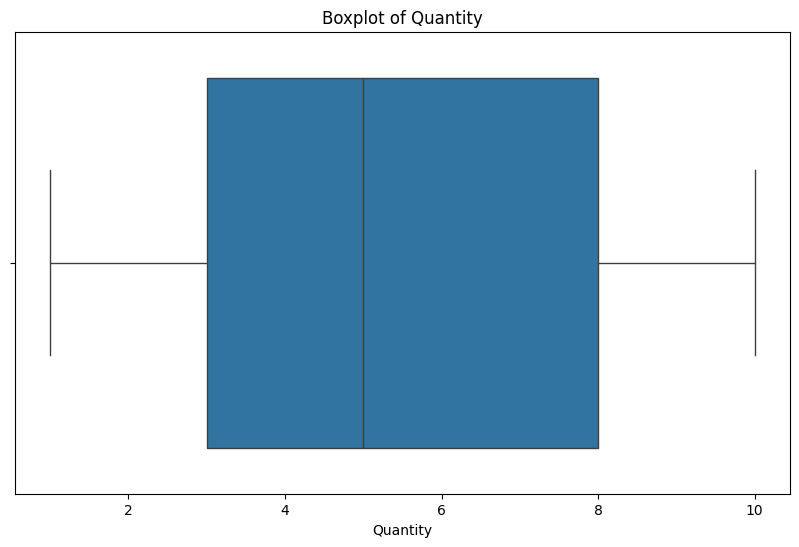

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Tax 5%'>

Text(0.5, 1.0, 'Boxplot of Tax 5%')

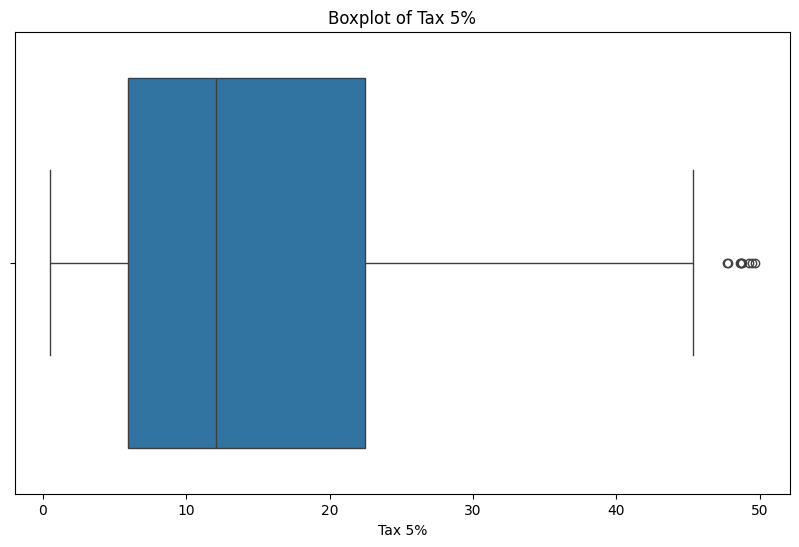

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Sales'>

Text(0.5, 1.0, 'Boxplot of Sales')

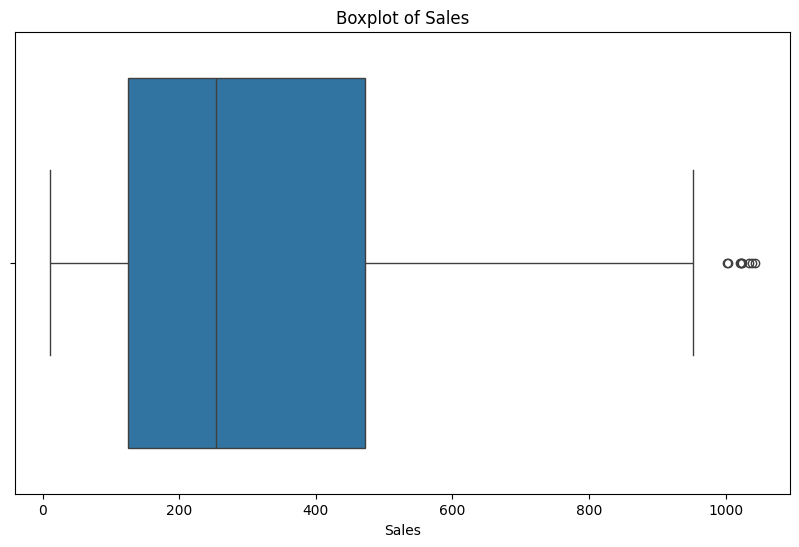

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='cogs'>

Text(0.5, 1.0, 'Boxplot of cogs')

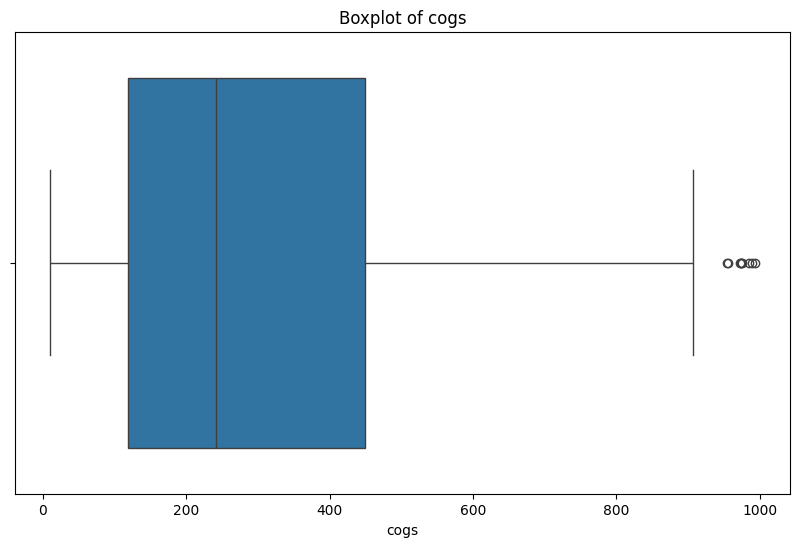

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='gross income'>

Text(0.5, 1.0, 'Boxplot of gross income')

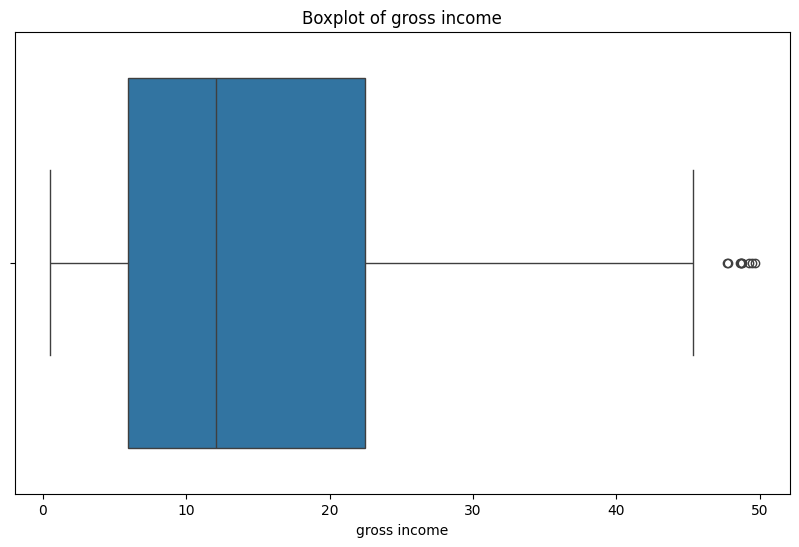

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Rating'>

Text(0.5, 1.0, 'Boxplot of Rating')

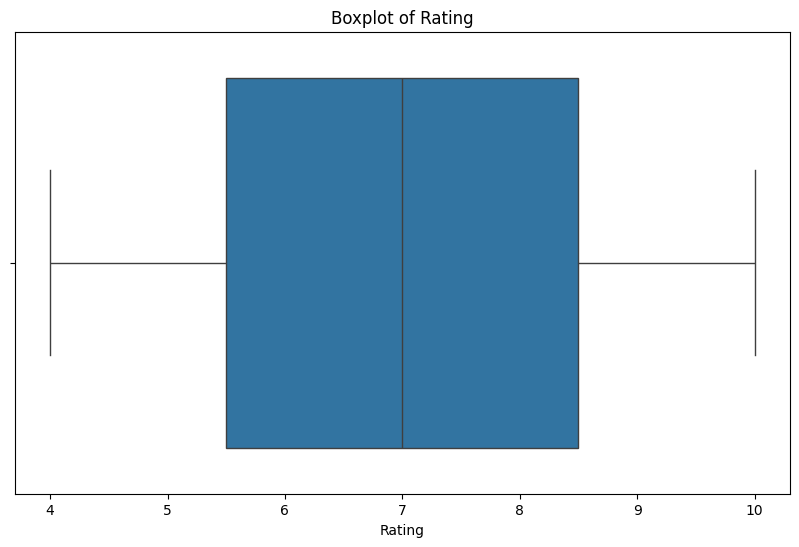

In [5]:
# List of numerical columns for outlier analysis
numerical_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Sales', 'cogs', 'gross income', 'Rating']

# Plot box plots for numerical columns to detect outliers
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=supermarket_data, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


Exploratory data analysis - Statistics and graphs

Descriptive Questions:

1. What is the average amount a customer spends when making purchases in different product categories?

<Figure size 1000x600 with 0 Axes>

<ipython-input-6-b7e767a30cfd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_spending.values, y=avg_spending.index, palette="viridis")


<Axes: ylabel='Product line'>

Text(0.5, 1.0, 'Average Spending by Product Category')

Text(0.5, 0, 'Average Sales')

Text(0, 0.5, 'Product Line')

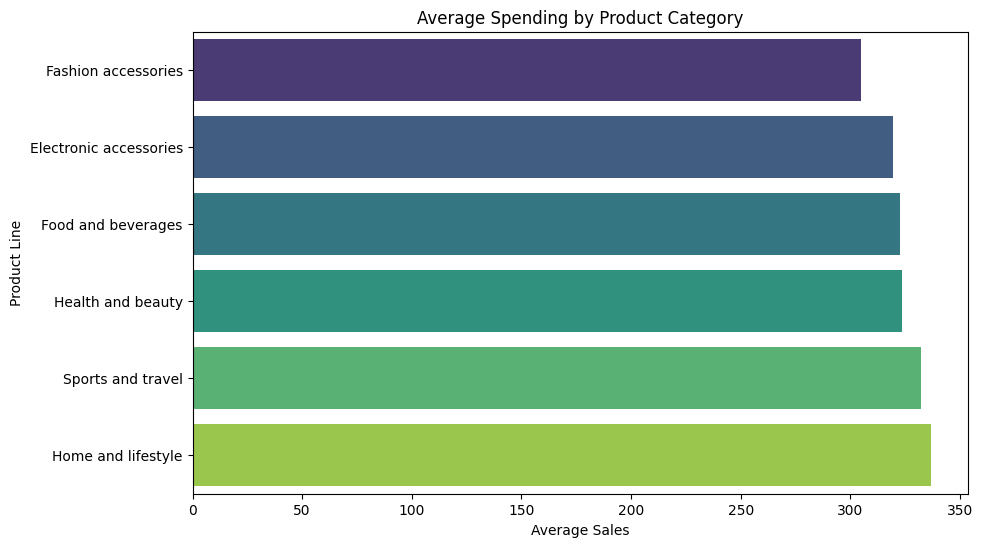

In [6]:
# Calculate average spending in each product category
avg_spending = supermarket_data.groupby('Product line')['Sales'].mean().sort_values()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_spending.values, y=avg_spending.index, palette="viridis")
plt.title('Average Spending by Product Category')
plt.xlabel('Average Sales')
plt.ylabel('Product Line')
plt.show()


Insights from Average Spending by Product Category

    Highest Average Spending:
        Home and Lifestyle: $336.64 on average.
        Sports and Travel: $332.07 on average.

    Lowest Average Spending:
        Fashion Accessories: $305.09 on average.
        Electronic Accessories: $319.63 on average.

    Mid-Range Categories:
        Food and Beverages: $322.67.
        Health and Beauty: $323.64.
1. Customers spend the most on Home and Lifestyle and Sports and Travel, which might indicate higher-priced products in these categories or higher demand.
2. Fashion Accessories generate the least average spending, suggesting either lower-priced items or fewer purchases in this category.

2. What is the frequency of Ewallets, Cash and Credit Card payment options within the dataset?

<Figure size 1000x600 with 0 Axes>

<ipython-input-7-72a46277feef>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_freq.index, y=payment_freq.values, palette="coolwarm")


<Axes: xlabel='Payment'>

Text(0.5, 1.0, 'Frequency of Payment Methods')

Text(0.5, 0, 'Payment Method')

Text(0, 0.5, 'Frequency')

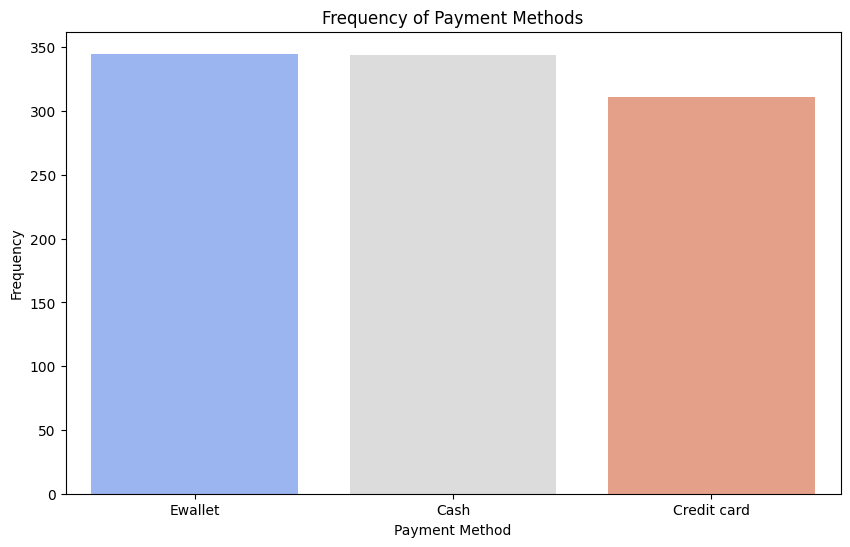

,count
Payment,
Ewallet,345
Cash,344
Credit card,311


In [7]:
# Calculate the frequency of each payment method
payment_freq = supermarket_data['Payment'].value_counts()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_freq.index, y=payment_freq.values, palette="coolwarm")
plt.title('Frequency of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.show()

# Display the frequency values
payment_freq


Insights from the Payment Method Analysis

    Most Preferred Payment Method:
        Ewallet: Used in 345 transactions, making it the most frequently used payment method.

    Other Payment Methods:
        Cash: Used in 344 transactions, almost as popular as Ewallet.
        Credit Card: Used in 311 transactions, slightly less common.

    Key Observation:
        The usage of payment methods is relatively balanced, but Ewallet has a slight edge, potentially indicating customer preference for digital payment solutions.

1. Digital payments like Ewallets are slightly more popular, possibly due to convenience or promotions.
2. Cash remains equally significant, suggesting a mix of traditional and modern customer behavior.

3. Which of the store branches (Alex, Giza, etc.) achieves the highest average sales?

<Figure size 1000x600 with 0 Axes>

<ipython-input-8-7db6933d3c54>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_branch.index, y=avg_sales_branch.values, palette="magma")


<Axes: xlabel='Branch'>

Text(0.5, 1.0, 'Average Sales by Branch')

Text(0.5, 0, 'Branch')

Text(0, 0.5, 'Average Sales')

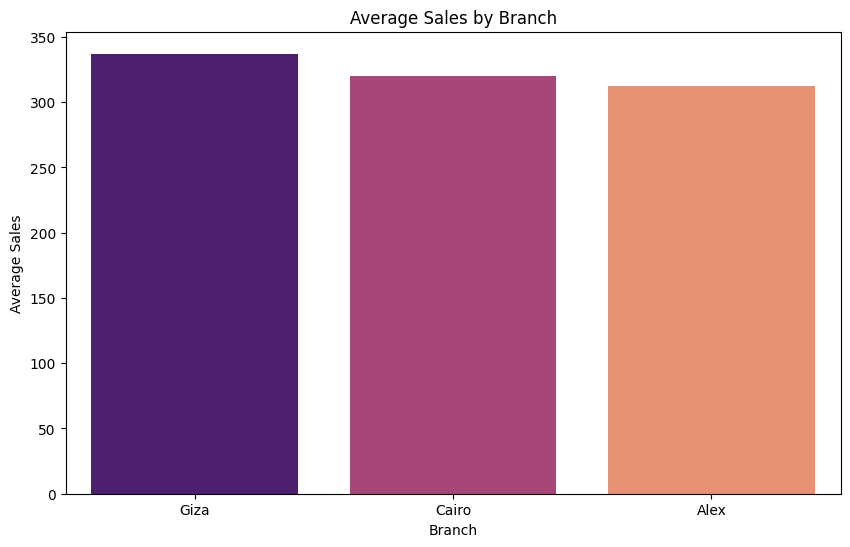

,Sales
Branch,
Giza,337.099715
Cairo,319.872506
Alex,312.354031


In [8]:
# Calculate the average sales for each branch
avg_sales_branch = supermarket_data.groupby('Branch')['Sales'].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_branch.index, y=avg_sales_branch.values, palette="magma")
plt.title('Average Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Average Sales')
plt.show()

# Display the average sales for each branch
avg_sales_branch

Insights from Branch Performance Analysis

    Highest Average Sales:
        Giza: Achieves the highest average sales at $337.10 per transaction.

    Other Branches:
        Cairo: Follows with an average sales amount of $319.87.
        Alex: Slightly lower at $312.35.

    Key Observations:
        Giza outperforms other branches, potentially due to higher demand, better product offerings, or location advantages.
        The difference between Cairo and Alex is marginal, indicating similar performance levels in these locations.

1. Giza could be prioritized for expansion or resource allocation given its higher performance.
2. Investigating why Giza performs better could yield valuable insights for other branches.

4. What is the spread of the average customer rating?

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Rating', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Customer Ratings')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Frequency')

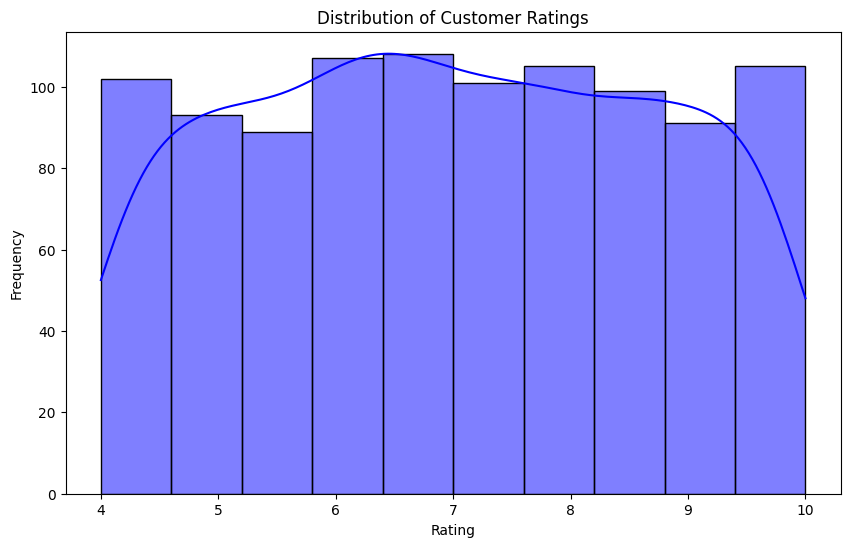

,Rating
count,1000.00000
mean,6.97270
std,1.71858
min,4.00000
25%,5.50000
50%,7.00000
75%,8.50000
max,10.00000


In [9]:
# Plot the distribution of customer ratings
plt.figure(figsize=(10, 6))
sns.histplot(supermarket_data['Rating'], bins=10, kde=True, color="blue")
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Display descriptive statistics for the Rating column
rating_stats = supermarket_data['Rating'].describe()
rating_stats


Insights from the Customer Ratings Distribution

    Overall Rating Trends:
        Mean Rating: 6.97 (approximately 7), indicating generally positive feedback from customers.
        Median Rating: 7.0, consistent with the mean.

    Rating Range:
        Minimum Rating: 4.0.
        Maximum Rating: 10.0.
        Indicates a full spectrum of feedback, from moderate to highly positive.

    Spread:
        Standard Deviation: 1.72, showing moderate variation in customer ratings.
        Most ratings fall between 5.5 (25th percentile) and 8.5 (75th percentile).

    Key Observation:
        The distribution is slightly skewed toward higher ratings, indicating that customers are generally satisfied.



  1. Customer feedback is largely positive, with very few low ratings.
  2. Efforts to improve the experience for customers giving ratings of 5–6 could further enhance overall satisfaction.

5. How is the quantity being purchased proportional to the total sales amount?

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Quantity', ylabel='Sales'>

Text(0.5, 1.0, 'Relationship Between Quantity and Sales')

Text(0.5, 0, 'Quantity')

Text(0, 0.5, 'Sales')

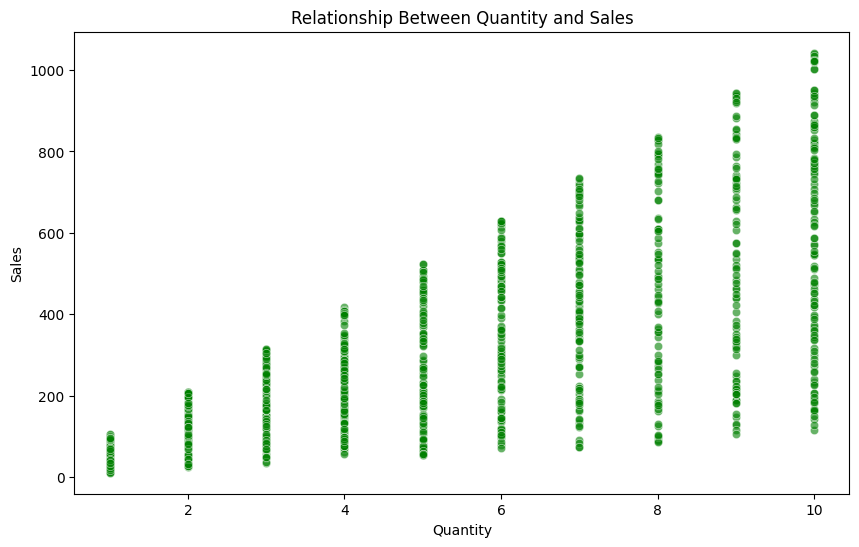

0.7055101859433066

In [10]:
# Plot the relationship between Quantity and Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=supermarket_data, x='Quantity', y='Sales', color="green", alpha=0.6)
plt.title('Relationship Between Quantity and Sales')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.show()

# Calculate the correlation between Quantity and Sales
correlation = supermarket_data['Quantity'].corr(supermarket_data['Sales'])
correlation


Insights from the Relationship Between Quantity and Sales

    Positive Correlation:
        The correlation coefficient between Quantity and Sales is 0.71, indicating a strong positive relationship. As the quantity of items purchased increases, the total sales amount tends to increase proportionally.

    Scatter Plot Observations:
        The points generally follow an upward trend, confirming the strong relationship.
        Some transactions with higher quantities show disproportionately high sales, likely influenced by product price.

    Key Observations:
        While the relationship is strong, the variability in Sales for the same Quantity suggests the impact of product pricing (e.g., higher-priced items lead to higher sales for the same quantity).

1. Encouraging customers to purchase higher quantities can effectively drive up sales.
2. Sales promotions (e.g., discounts for bulk purchases) might be a good strategy to leverage this relationship.

6. Which city contributes the most to sales?

<Figure size 1000x600 with 0 Axes>

<ipython-input-11-2078ff258db8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_city.values, y=sales_by_city.index, palette="coolwarm")


<Axes: ylabel='City'>

Text(0.5, 1.0, 'Total Sales by City')

Text(0.5, 0, 'Total Sales')

Text(0, 0.5, 'City')

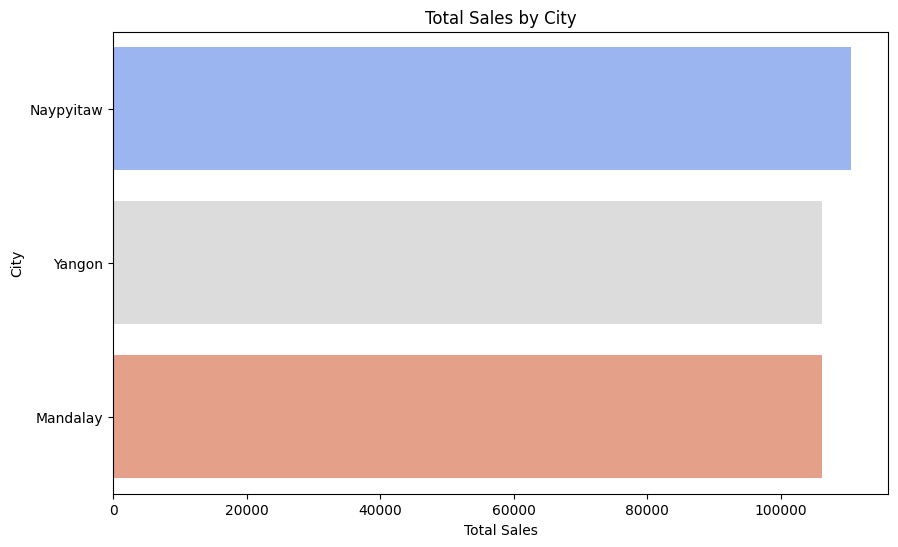

In [11]:
# Total sales by city
sales_by_city = supermarket_data.groupby('City')['Sales'].sum().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_city.values, y=sales_by_city.index, palette="coolwarm")
plt.title('Total Sales by City')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()

Insights:

    Identify the city with the highest total sales to understand regional performance.
    Differences between cities may indicate variations in customer behavior, demand, or operational effectiveness.

  1. Focus marketing and resources on the top-performing city.
  2. Investigate reasons for lower sales in underperforming cities (e.g., product mix, promotions, or customer preferences).

7. What is the distribution of sales over time (e.g., hourly trends)?

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Hour'>

Text(0.5, 1.0, 'Sales by Hour of the Day')

Text(0.5, 0, 'Hour')

Text(0, 0.5, 'Total Sales')

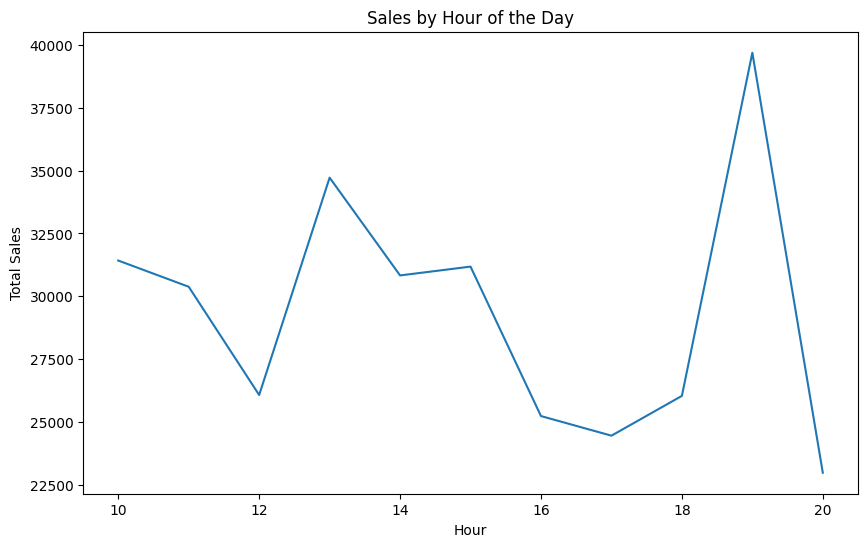

In [12]:
# Extract hour from time
supermarket_data['Hour'] = pd.to_datetime(supermarket_data['Time'], format='%H:%M:%S').dt.hour

# Aggregate sales by hour
sales_by_hour = supermarket_data.groupby('Hour')['Sales'].sum()

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_by_hour.index, y=sales_by_hour.values)
plt.title('Sales by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.show()


Insights:

    Identify peak transaction hours when sales are the highest.
    For instance, lunch hours or evening hours might show higher activity due to customer availability.



  1. Align staffing, inventory, and promotions with peak sales hours.
  2. Explore opportunities to boost sales during low-activity periods.

 8. Which customer type spends more on average (Members vs. Normal)?

<Figure size 1000x600 with 0 Axes>

<ipython-input-13-47fdd9b81d47>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_by_customer_type.index, y=avg_sales_by_customer_type.values, palette="magma")


<Axes: xlabel='Customer type'>

Text(0.5, 1.0, 'Average Sales by Customer Type')

Text(0.5, 0, 'Customer Type')

Text(0, 0.5, 'Average Sales')

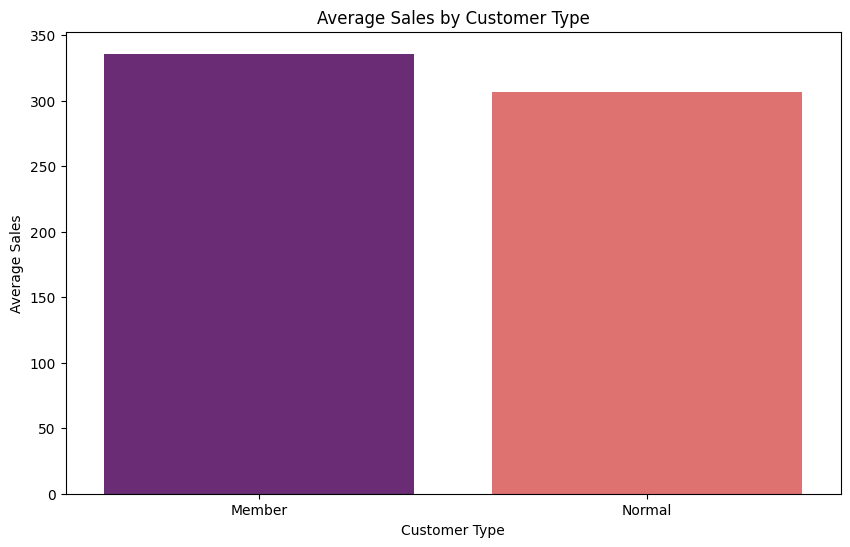

In [13]:
# Average sales by customer type
avg_sales_by_customer_type = supermarket_data.groupby('Customer type')['Sales'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_by_customer_type.index, y=avg_sales_by_customer_type.values, palette="magma")
plt.title('Average Sales by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Sales')
plt.show()


Insights:

    Members are likely to have higher spending due to loyalty benefits or tailored offers.
    If Normal customers spend more, it may indicate opportunities to convert them to Members.

  1. Enhance loyalty programs to increase spending from Members.
  2. Tailor promotions to attract Normal customers and convert them into Members.

9. Which gender contributes more to sales?

<Figure size 1000x600 with 0 Axes>

<ipython-input-14-51b3fa219d1a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_gender.index, y=sales_by_gender.values, palette="viridis")


<Axes: xlabel='Gender'>

Text(0.5, 1.0, 'Total Sales by Gender')

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Total Sales')

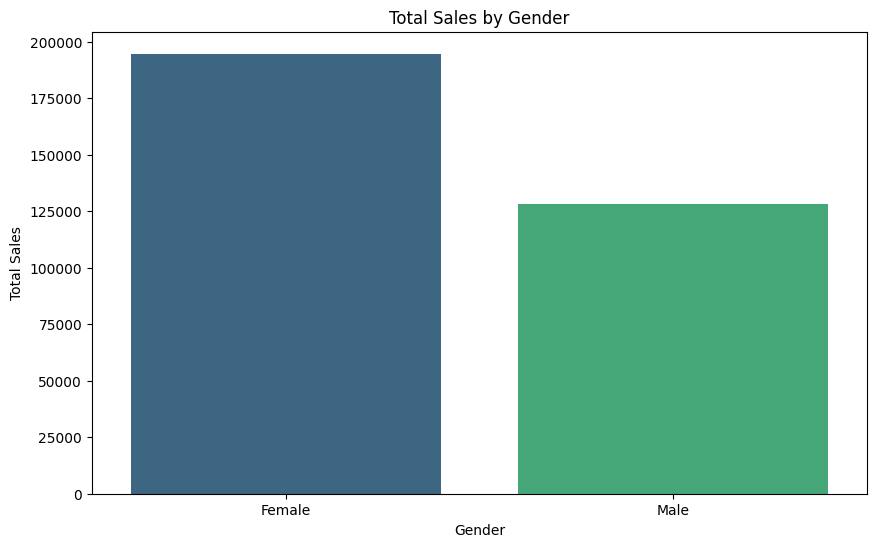

In [14]:
# Total sales by gender
sales_by_gender = supermarket_data.groupby('Gender')['Sales'].sum()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_gender.index, y=sales_by_gender.values, palette="viridis")
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()


Insights:

    Understand gender-based preferences and their impact on total sales.
    For instance, one gender might dominate spending in specific product lines (e.g., Health and Beauty, Sports and Travel).

  1. Design gender-specific promotions or offers to boost sales.
  2. Stock inventory aligned with preferences of the dominant gender in key categories.

10. What is the most popular product line in terms of quantity sold?

<Figure size 1000x600 with 0 Axes>

<ipython-input-15-755d38a60ad5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quantity_by_product_line.values, y=quantity_by_product_line.index, palette="plasma")


<Axes: ylabel='Product line'>

Text(0.5, 1.0, 'Total Quantity Sold by Product Line')

Text(0.5, 0, 'Total Quantity')

Text(0, 0.5, 'Product Line')

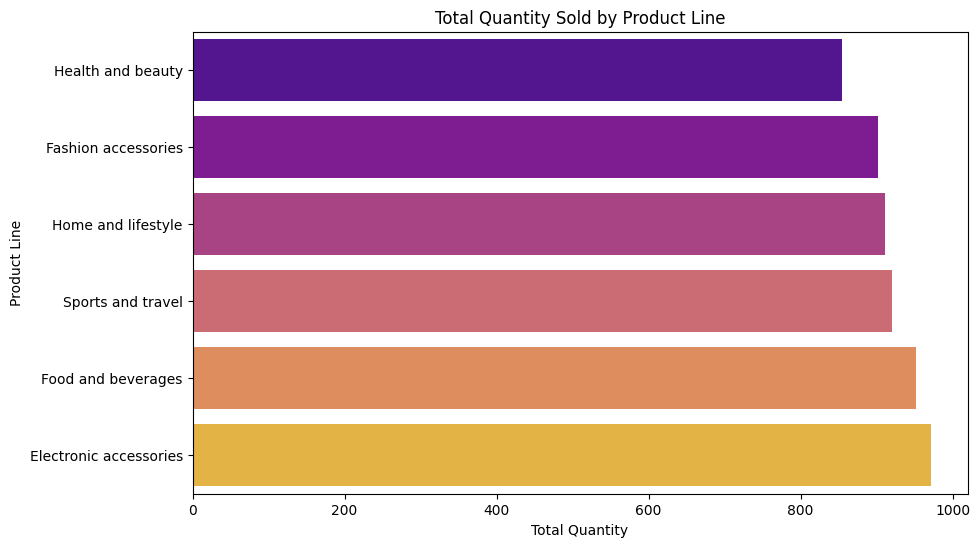

In [15]:
# Total quantity sold by product line
quantity_by_product_line = supermarket_data.groupby('Product line')['Quantity'].sum().sort_values()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=quantity_by_product_line.values, y=quantity_by_product_line.index, palette="plasma")
plt.title('Total Quantity Sold by Product Line')
plt.xlabel('Total Quantity')
plt.ylabel('Product Line')
plt.show()


Insights:

    Highlight the product categories with the highest demand in terms of quantity.
    For example, Food and Beverages may sell in larger quantities but at lower prices, while Electronics may be fewer in quantity but higher in value.

  1. Ensure optimal stock levels for high-demand categories to meet customer needs.
  2. Use sales volume data to negotiate better deals with suppliers for popular products.

Predictive Question:
1.	Can we anticipate the total sale amount influenced by customer type, gender, product line and payment options?


Linear Regression Models

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = supermarket_data[['Customer type', 'Gender', 'Product line', 'Payment', 'Unit price', 'Quantity']]
y = supermarket_data['Sales']

# Encoding categorical features
categorical_features = ['Customer type', 'Gender', 'Product line', 'Payment']
numerical_features = ['Unit price', 'Quantity']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with a regression model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Fit the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Unit price', 'Quantity']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Customer type', 'Gender',
                                                   'Product line',
                                                   'Payment'])])),
                ('regressor', LinearRegression())])

Model Evaluation

In [17]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Root Mean Squared Error (RMSE): 79.82566212632227
R² Score: 0.9020560458506336


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Define the pipeline with a Random Forest model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Fit the model
rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Unit price', 'Quantity']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Customer type', 'Gender',
                                                   'Product line',
                                                   'Payment'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

Evaluate the Random Forest Model

In [19]:
# Make predictions
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R² Score: {r2_rf}")


Random Forest RMSE: 8.249637616972153
Random Forest R² Score: 0.9989539262180495


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model Performance Insights

    Root Mean Squared Error (RMSE):
        Linear Regression: RMSE of 79.85 indicates higher average prediction errors.
        Random Forest: RMSE of 8.25 shows significantly lower errors, demonstrating better accuracy.

    R² Score:
        Linear Regression: R² of 0.90 indicates the model explains about 90% of the variance in Sales.
        Random Forest: R² of 0.99 indicates the model explains almost all the variance, showcasing superior performance.

1. Random Forest outperforms Linear Regression significantly, likely due to its ability to handle non-linear relationships and feature interactions.
2. Random Forest's higher accuracy makes it the preferred model for predicting Sales.

2. Can we predict whether a customer is a "Member" or "Normal" based on transaction details?

Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Features and target
X_membership = supermarket_data[['Gender', 'Product line', 'Payment', 'Unit price', 'Quantity', 'Sales', 'gross income']]
y_membership = supermarket_data['Customer type']

# Split the data
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_membership, y_membership, test_size=0.2, random_state=42)

# Preprocessing pipeline for classification
preprocessor_m = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Unit price', 'Quantity', 'Sales', 'gross income']),
        ('cat', OneHotEncoder(), ['Gender', 'Product line', 'Payment'])
    ])

# Logistic Regression pipeline
lr_pipeline_m = Pipeline(steps=[('preprocessor', preprocessor_m),
                                ('classifier', LogisticRegression(random_state=42))])

# Fit the model
lr_pipeline_m.fit(X_train_m, y_train_m)

# Predictions and evaluation
y_pred_lr_m = lr_pipeline_m.predict(X_test_m)
print("Logistic Regression Classification Report:")
print(classification_report(y_test_m, y_pred_lr_m))


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Unit price', 'Quantity',
                                                   'Sales', 'gross income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Product line',
                                                   'Payment'])])),
                ('classifier', LogisticRegression(random_state=42))])

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      Member       0.61      0.81      0.69       110
      Normal       0.60      0.36      0.45        90

    accuracy                           0.60       200
   macro avg       0.60      0.58      0.57       200
weighted avg       0.60      0.60      0.58       200



Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest pipeline
rf_pipeline_m = Pipeline(steps=[('preprocessor', preprocessor_m),
                                 ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Fit the model
rf_pipeline_m.fit(X_train_m, y_train_m)

# Predictions and evaluation
y_pred_rf_m = rf_pipeline_m.predict(X_test_m)
print("Random Forest Classification Report:")
print(classification_report(y_test_m, y_pred_rf_m))

# ROC-AUC Score
y_pred_proba_rf = rf_pipeline_m.predict_proba(X_test_m)[:, 1]
roc_auc_rf = roc_auc_score(y_test_m, y_pred_proba_rf)
print(f"Random Forest ROC-AUC Score: {roc_auc_rf}")


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Unit price', 'Quantity',
                                                   'Sales', 'gross income']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Product line',
                                                   'Payment'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Random Forest Classification Report:
              precision    recall  f1-score   support

      Member       0.59      0.72      0.65       110
      Normal       0.53      0.39      0.45        90

    accuracy                           0.57       200
   macro avg       0.56      0.55      0.55       200
weighted avg       0.56      0.57      0.56       200

Random Forest ROC-AUC Score: 0.5793434343434344


 Logistic Regression:

    Strengths:
        Slightly higher accuracy and ROC-AUC, indicating better overall classification performance.
        Stronger recall and F1-Score for "Member", making it better for identifying this class.
    Weaknesses:
        Struggles with the "Normal" class (lower precision and recall).
        Linear model assumptions may miss non-linear relationships.

Random Forest:

    Strengths:
        Marginally better at predicting "Normal" customers (higher recall).
        Captures non-linear relationships.
    Weaknesses:
        Overall lower accuracy and ROC-AUC.
        Similar bias toward "Member", with weaker performance for "Normal".